In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

df = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")

In [4]:
df.shape

(6607, 20)

In [5]:
df.sample(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
4123,21,81,High,Medium,Yes,7,86,Medium,Yes,1,Low,Medium,Public,Neutral,4,No,College,Near,Male,69
4818,24,66,High,Medium,Yes,7,71,Low,Yes,1,Low,High,Public,Neutral,3,No,High School,Near,Male,66
1332,19,89,Medium,High,Yes,4,66,Low,Yes,1,Low,Medium,Public,Positive,1,No,Postgraduate,Near,Female,69
1129,22,76,Medium,Low,No,9,87,Low,Yes,2,Low,High,Public,Neutral,3,Yes,College,Near,Female,65
6469,16,94,Low,Medium,Yes,8,58,Medium,Yes,2,Low,Medium,Public,Positive,3,Yes,College,Near,Male,67


In [6]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [7]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [8]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
df.loc[df.duplicated()]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


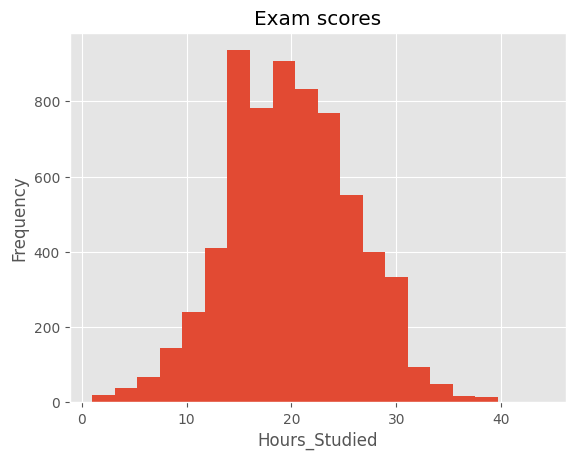

In [2]:
ax = df["Hours_Studied"].plot(kind = 'hist',bins = 20, title = "Exam scores")
ax.set_xlabel("Hours_Studied")
plt.show()

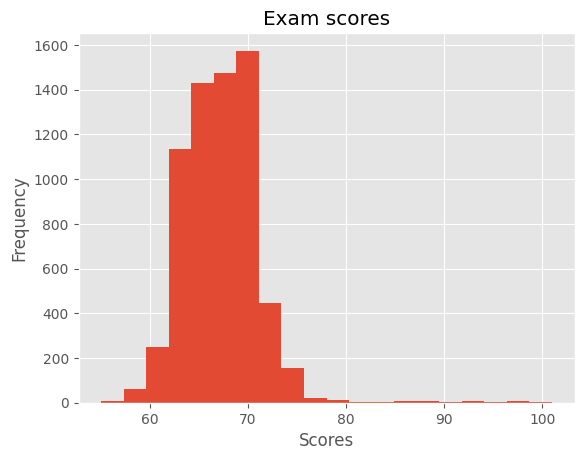

In [10]:
ax = df["Exam_Score"].plot(kind = 'hist',bins = 20, title = "Exam scores")
ax.set_xlabel("Scores")
plt.show()

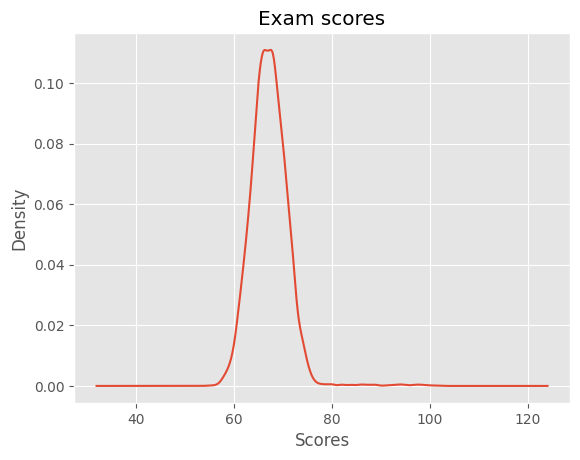

In [11]:
ax = df["Exam_Score"].plot(kind = 'kde', title = "Exam scores")
ax.set_xlabel("Scores")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

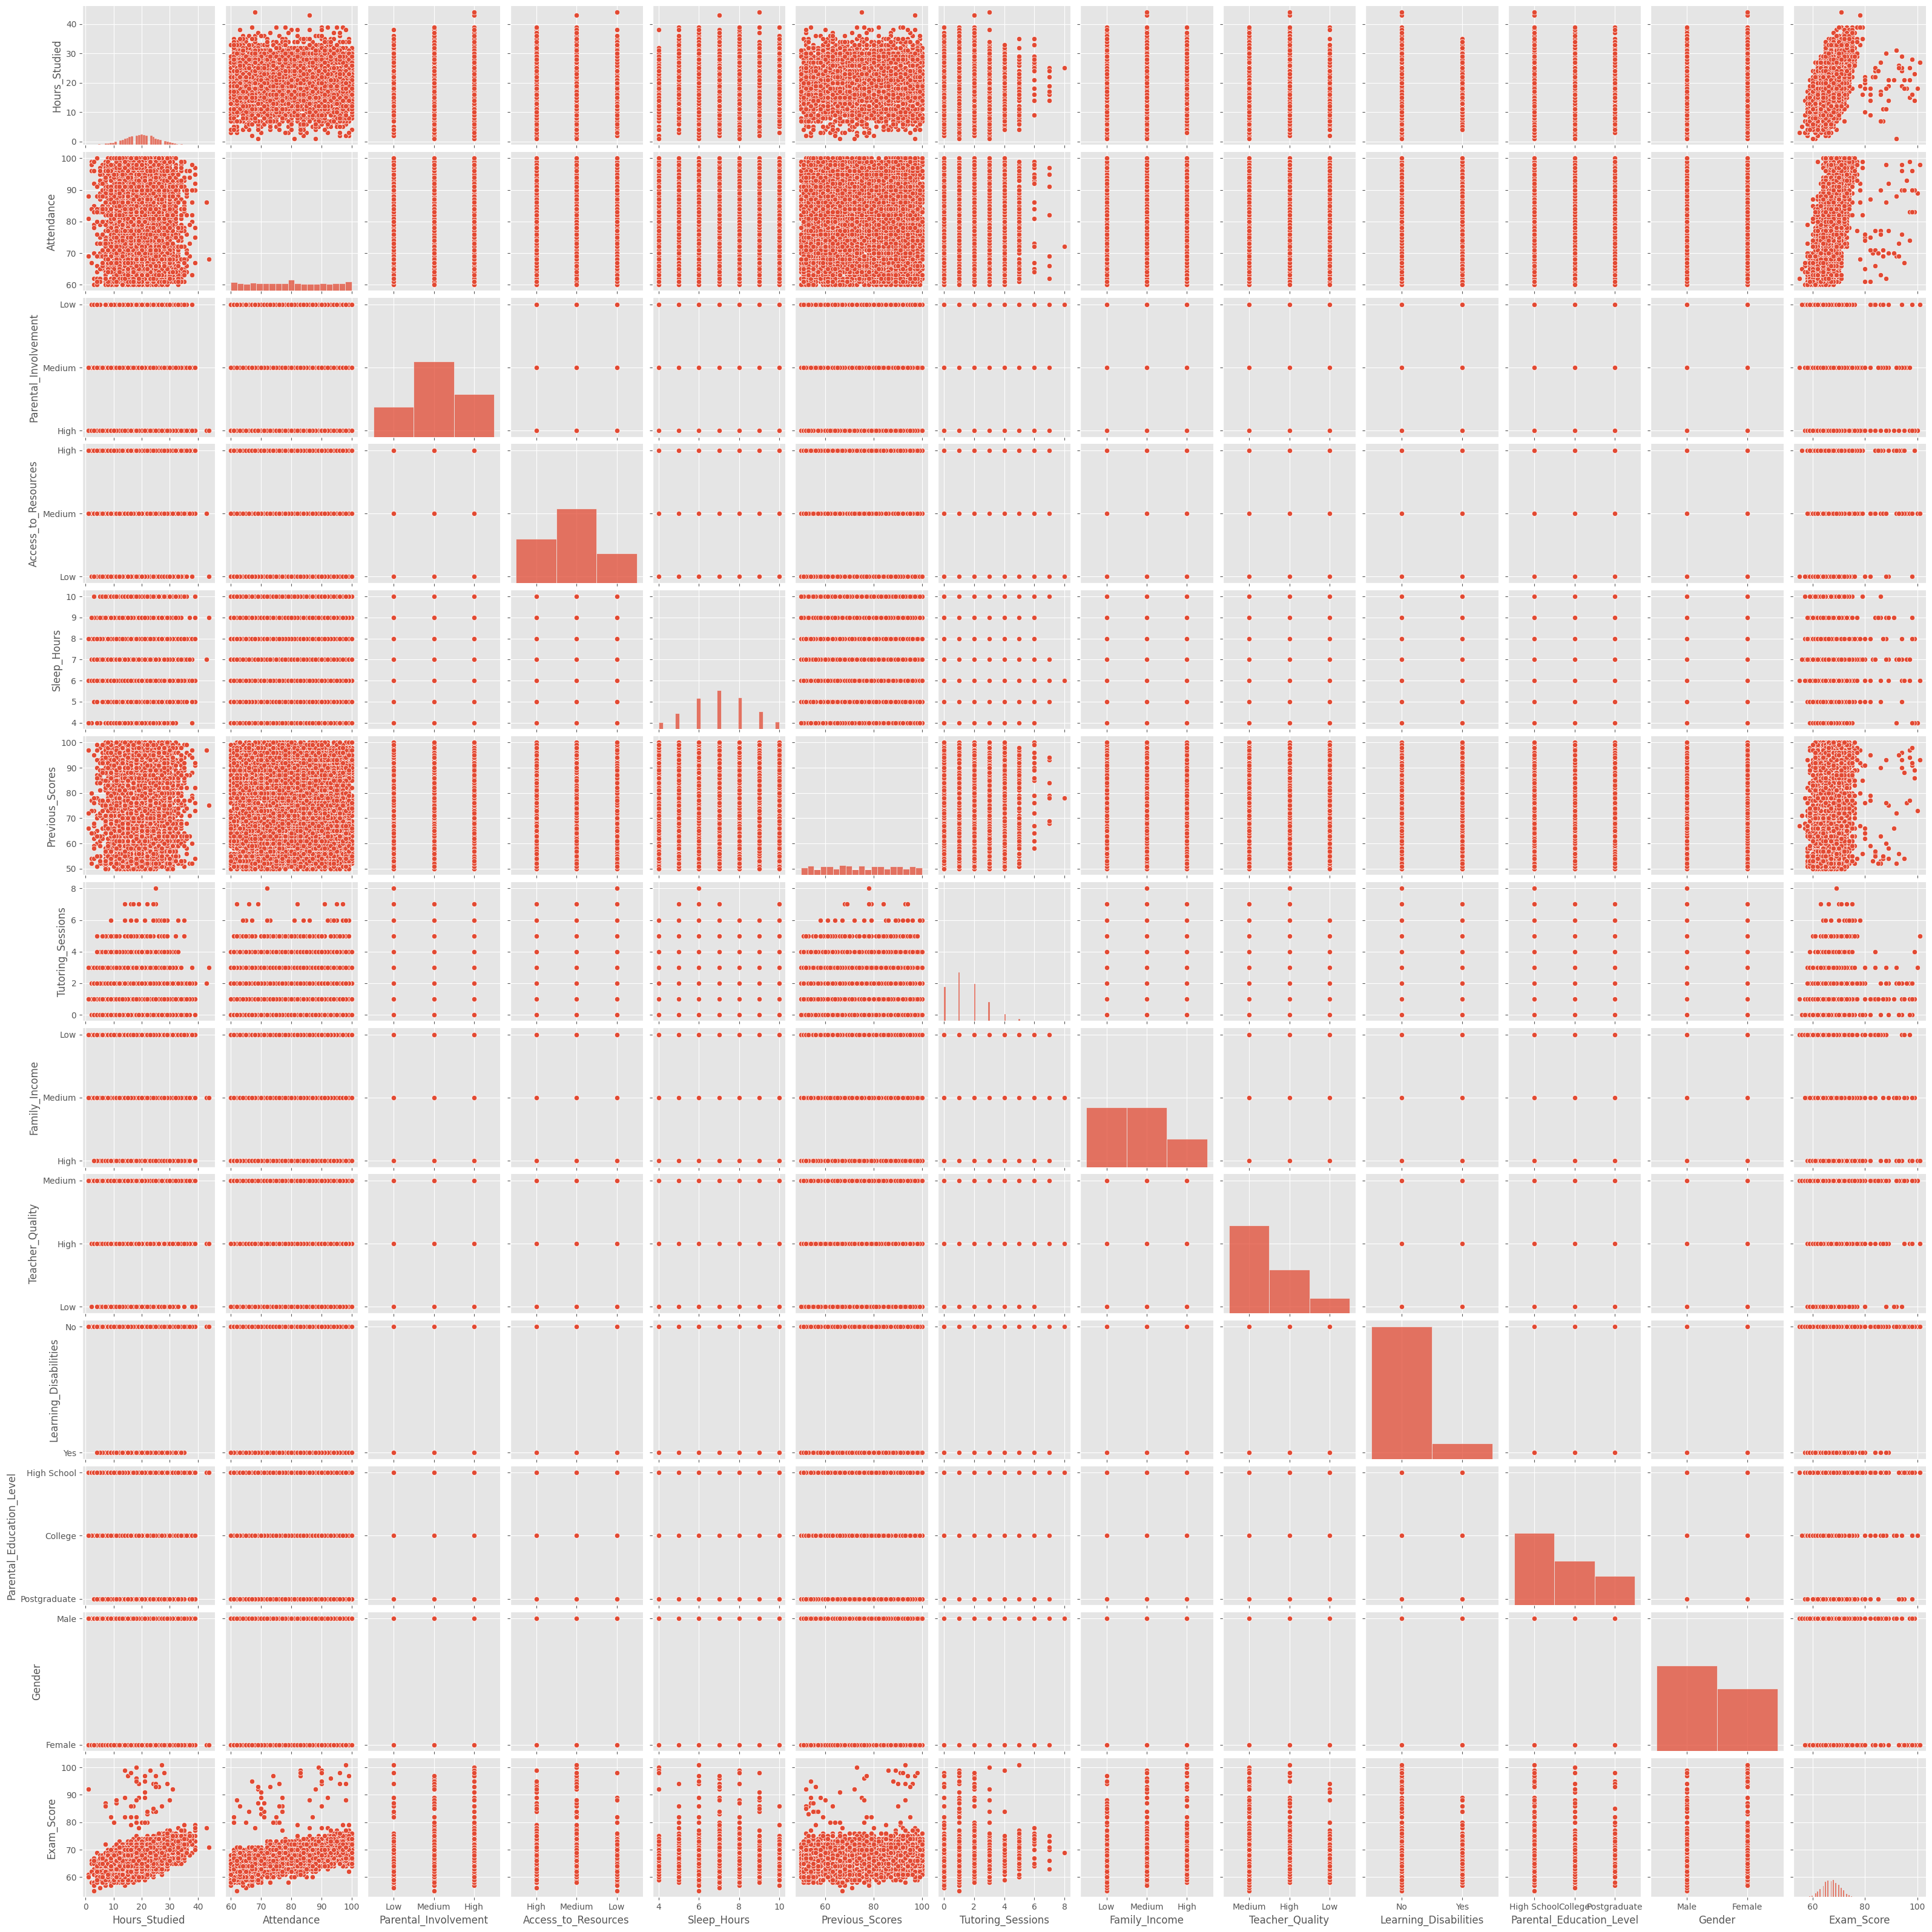

In [12]:
sns.pairplot(df,vars = ["Hours_Studied" ,"Attendance","Parental_Involvement","Access_to_Resources","Sleep_Hours" , "Previous_Scores","Tutoring_Sessions","Family_Income","Teacher_Quality","Learning_Disabilities","Parental_Education_Level","Gender","Exam_Score"])
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {} 
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 


## Single feature (Hours_Studied):

>## LinearRegression

RMSE: 3.29
R² Score: 0.23


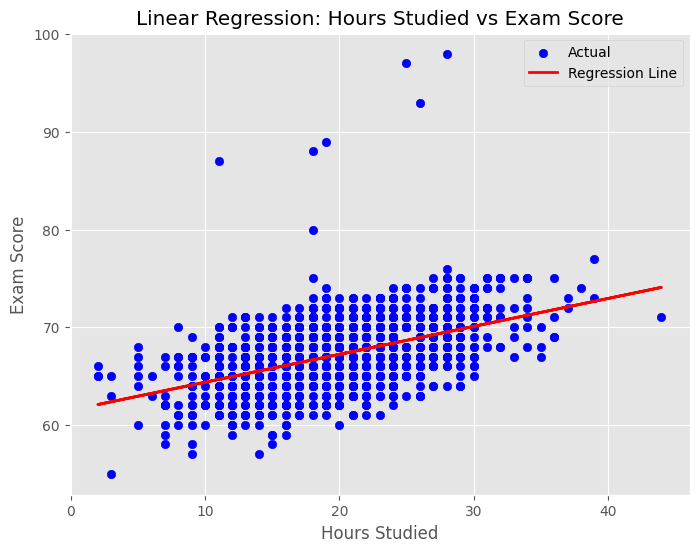

In [16]:
from sklearn.linear_model import LinearRegression

X_single = df[['Hours_Studied']]
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear Regression: Hours Studied vs Exam Score")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = df[['Hours_Studied']]
y = df["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_pipe = make_pipeline(StandardScaler(), Ridge())
param_grid = {
    "ridge__alpha": [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(ridge_pipe, param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Best alpha:", grid.best_params_["ridge__alpha"])
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Best alpha: 0.001
RMSE: 3.29
R² Score: 0.23


>### No big differeance after regularization 

>## PolynomialRegression

Polynomial Degree 3 RMSE: 3.29
R² Score: 0.23


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


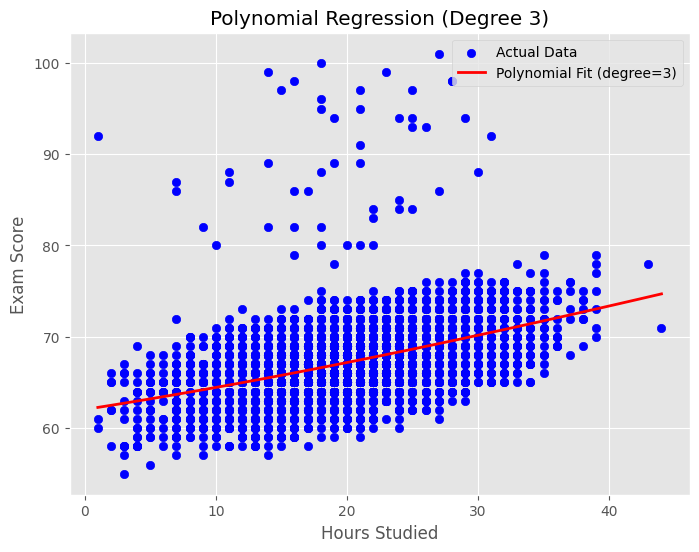

In [28]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 3

model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Polynomial Degree {degree} RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_plot, y_plot, color='red', label=f'Polynomial Fit (degree={degree})', linewidth=2)
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title(f"Polynomial Regression (Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()


>## Note: R² Score is low beacuse there is not enough features for the model to train 

## All features (bounes):

RMSE: 2.10
R² Score: 0.69


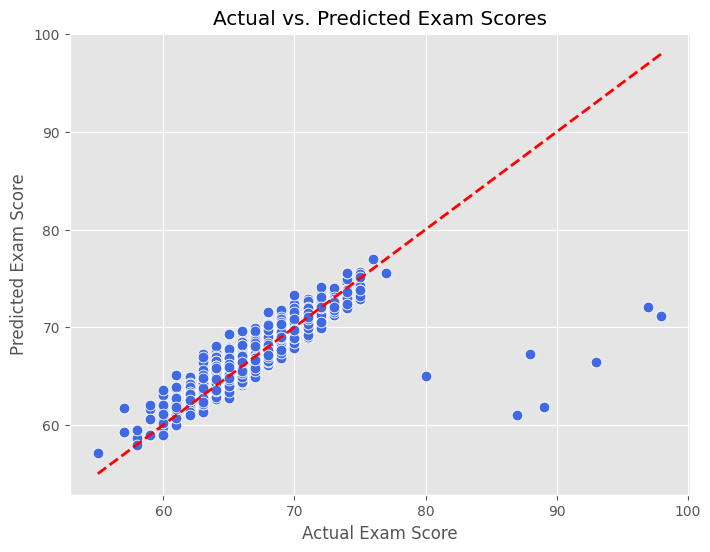

In [15]:
y = df["Exam_Score"]
X = df.drop(columns = "Exam_Score") 
X_train ,X_test, y_train ,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs. Predicted Exam Scores")
plt.grid(True)
plt.show()



Polynomial Degree 2 RMSE: 1.88
R² Score: 0.75


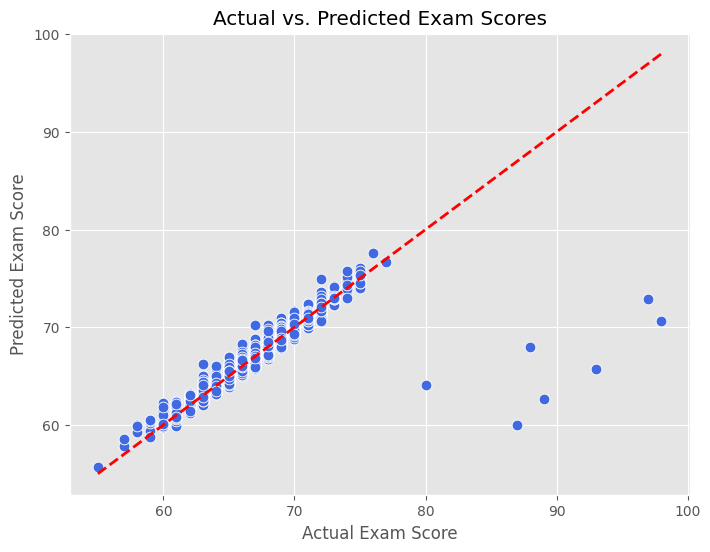

In [39]:
y = df["Exam_Score"]
X = df.drop(columns = "Exam_Score") 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2

model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Polynomial Degree {degree} RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs. Predicted Exam Scores")
plt.grid(True)
plt.show()


>## Note: There is huge imporvment due to the suffencient features and PolynomialRegression is better. 